# pre-processing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Optional: Display plots inline
%matplotlib inline


In [2]:
import pandas as pd

# Load your data
df_raw = pd.read_csv("amazon.csv")

# Make a copy for further processing
df = df_raw.copy()

# Check the shape of the original dataset
print("Original shape:", df_raw.shape)

# Preview the first few rows
df_raw.head()


Original shape: (1465, 16)


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [3]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [4]:
# Check basic info about the dataset
df.info()

# Check the shape (rows, columns)
print("Shape of dataset:", df.shape)

# Check column data types
print("\nData types:\n", df.dtypes)

# See a few rows to inspect visually
print("\nSample data:\n", df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [5]:
#Clean numeric columns (remove ₹, commas, %, and convert to float)
def clean_price_column(col):
    return df[col].astype(str).str.replace("₹", "").str.replace(",", "").str.strip().astype(float)

df['discounted_price'] = clean_price_column('discounted_price')
df['actual_price'] = clean_price_column('actual_price')
df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace("%", "").astype(float)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = df['rating_count'].astype(str).str.replace(",", "").astype(float)

# 4. Preview cleaned columns
df[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].head()


,discounted_price,actual_price,discount_percentage,rating,rating_count
0,399.0,1099.0,64.0,4.2,24269.0
1,199.0,349.0,43.0,4.0,43994.0
2,199.0,1899.0,90.0,3.9,7928.0
3,329.0,699.0,53.0,4.2,94363.0
4,154.0,399.0,61.0,4.2,16905.0


In [6]:
# Basic Cleaning

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check for duplicate rows
print("\nDuplicate rows:", df.duplicated().sum())


Missing values:
 product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

Duplicate rows: 0


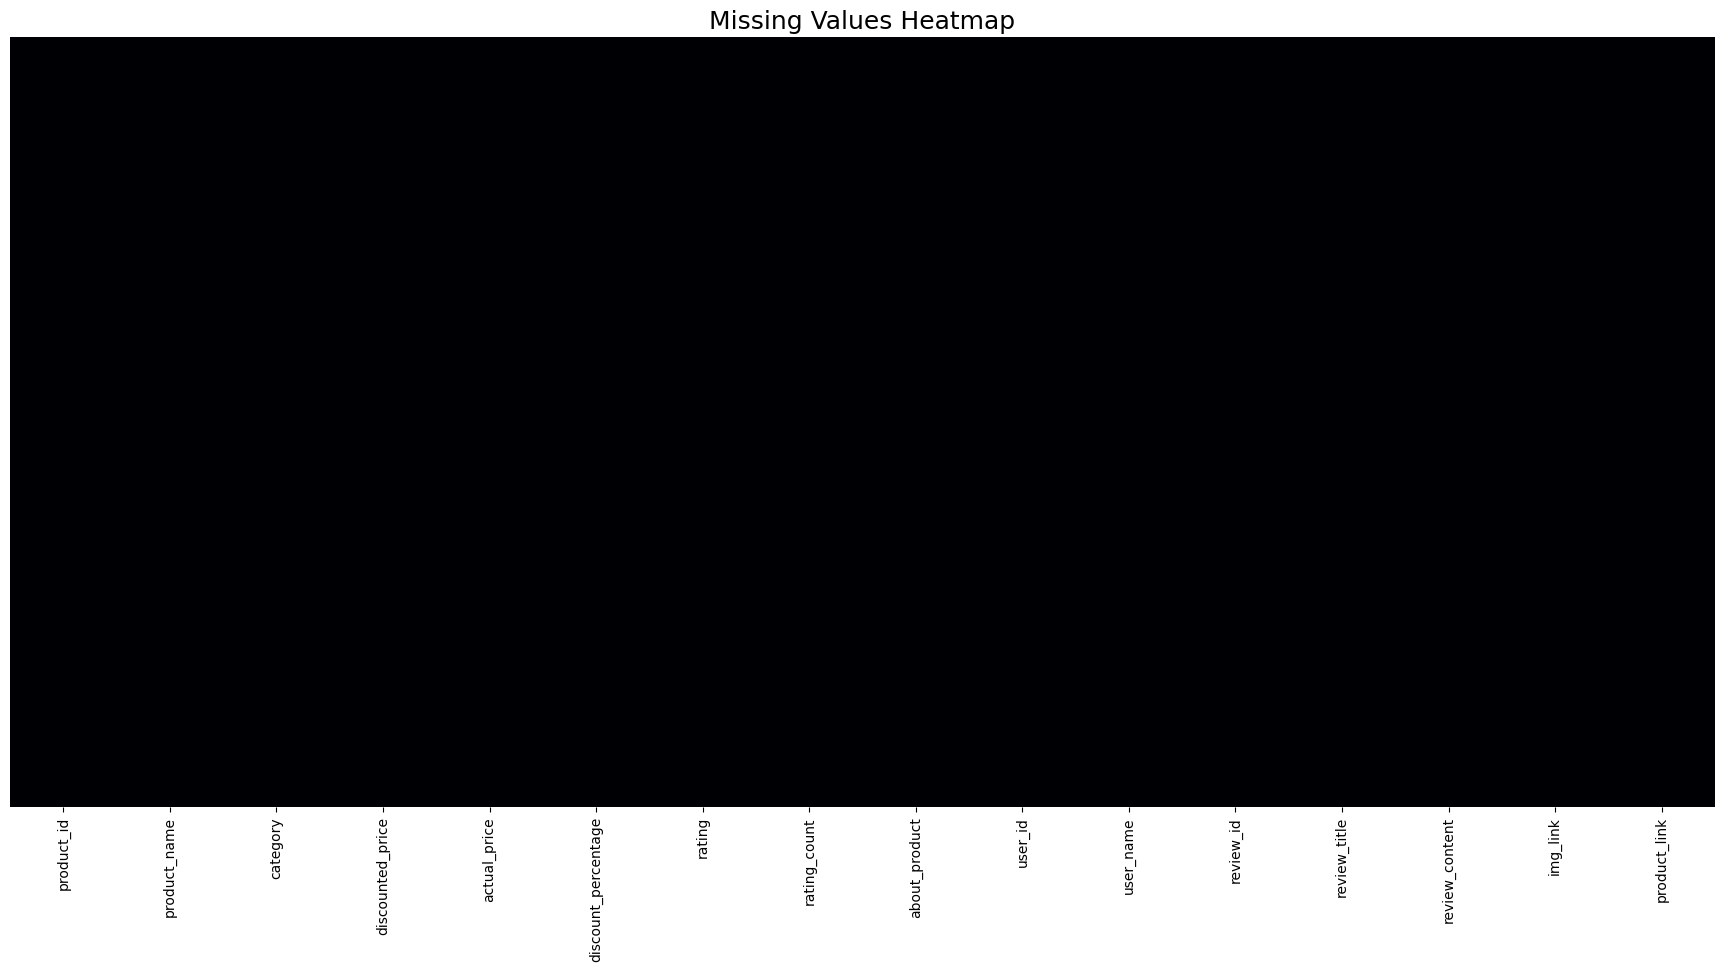

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(22, 10))

# Plot the null values in each column
sns.heatmap(df.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='inferno')

# Add a title
plt.title("Missing Values Heatmap", fontsize=18)

# Show the plot
plt.show()


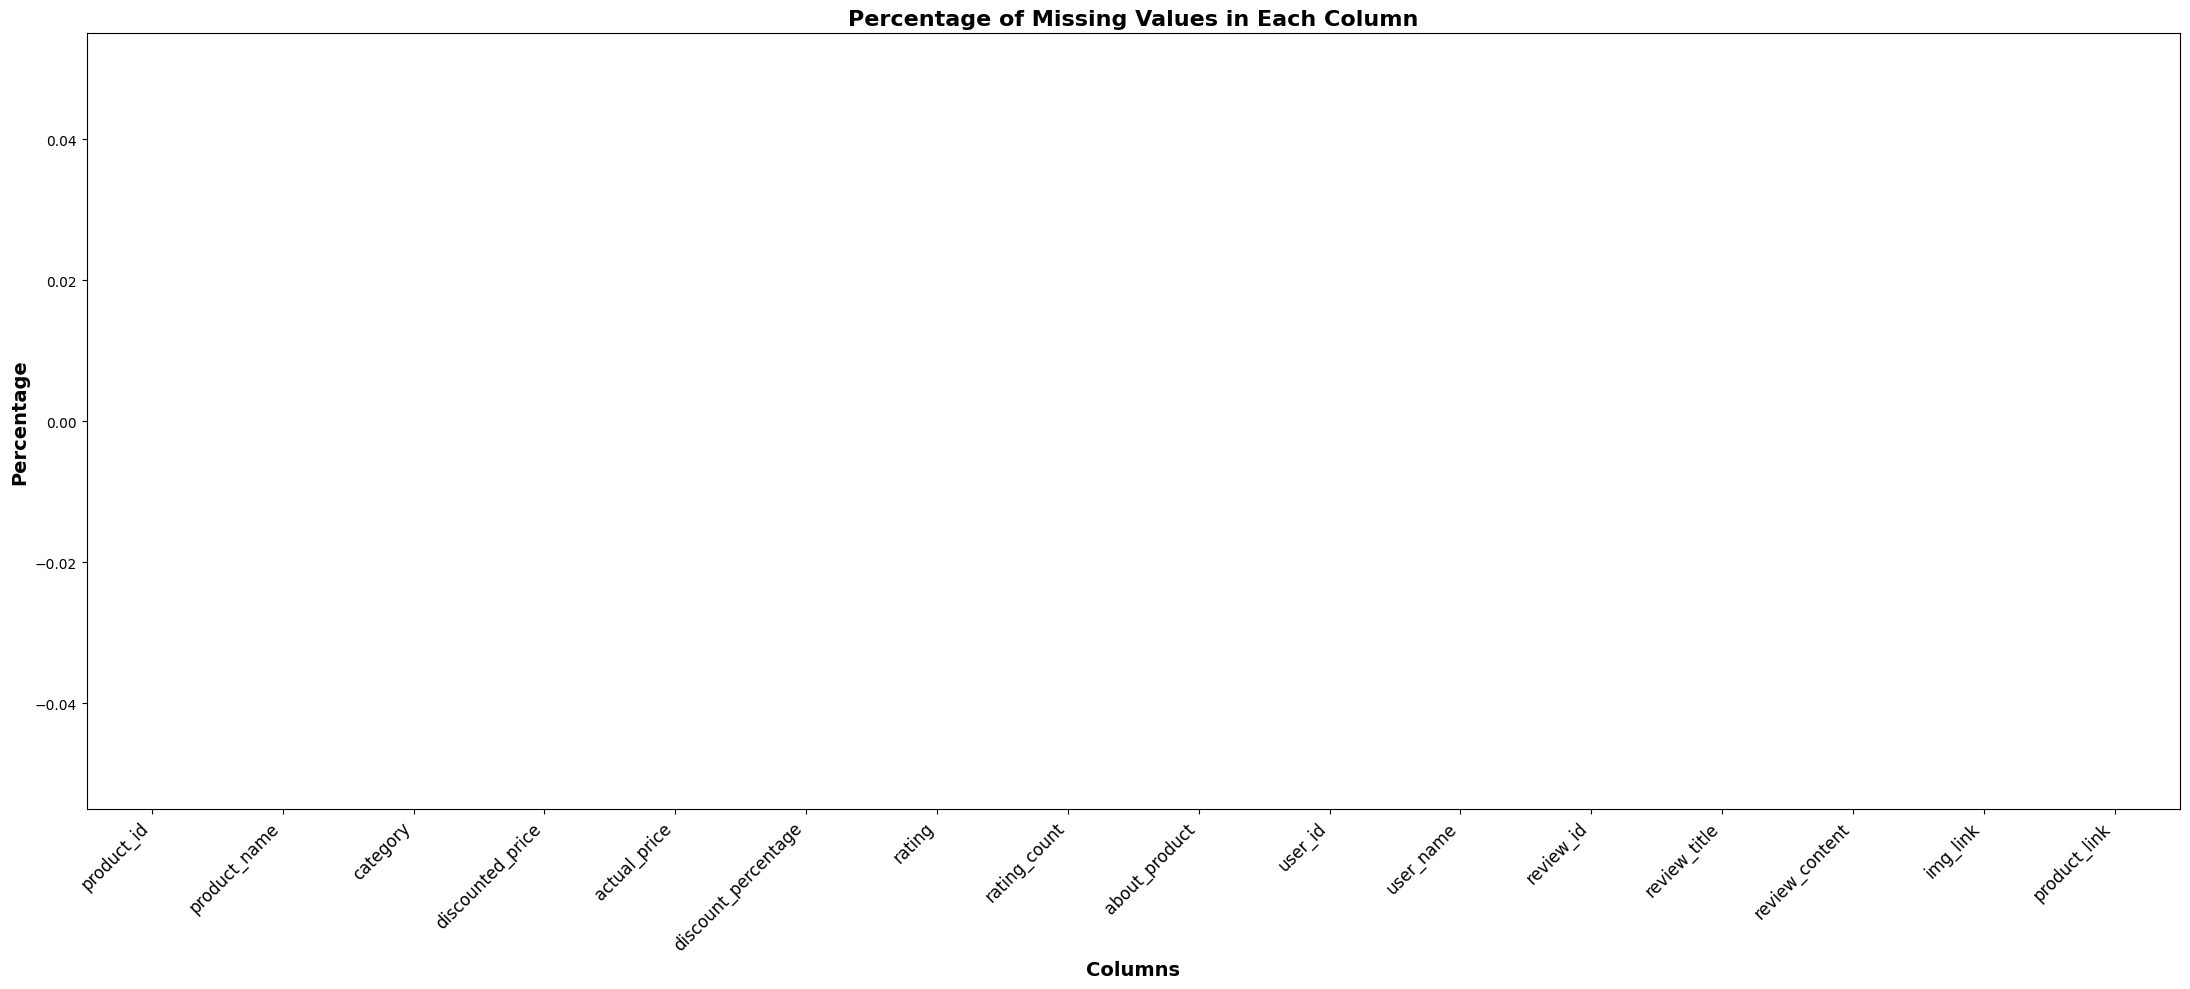

In [30]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(22, 10))

# Calculate missing percentage for each column
missing_percentage = df.isnull().sum() / len(df) * 100

# Plot the missing values as a bar chart with a new color
missing_percentage.plot(kind='bar', color='lightcoral')

# Add the labels and title
plt.xlabel('Columns', fontsize=14, fontweight='bold')
plt.ylabel('Percentage', fontsize=14, fontweight='bold')
plt.title('Percentage of Missing Values in Each Column', fontsize=16, fontweight='bold')

# Show the plot with adjusted tick labels
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()  # Adjust layout to prevent overlap

# Show the plot
plt.show()



In [31]:
df[df['rating_count'].isnull()].head(5)


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


In [32]:
# Convert rating_count to string type (if it's not already)
df['rating_count'] = df['rating_count'].astype(str)

# Remove commas and convert to numeric
df['rating_count'] = df['rating_count'].str.replace(',', '').astype(float)

# Impute missing values with median
df['rating_count'] = df['rating_count'].fillna(df['rating_count'].median())

# Check for any remaining nulls
print(int(df['rating_count'].isnull().sum()))


0


In [33]:
# Impute missing values
df['rating_count'] = df.rating_count.fillna(value=df['rating_count'].mean())

# check
int(df['rating_count'].isnull().sum())


0

In [34]:
df.isnull().sum().sort_values(ascending = False)


product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [35]:
# Convert rating to numeric if needed
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Fill missing rating with median
df['rating'] = df['rating'].fillna(df['rating'].median())

# Check if any missing values remain
print(df['rating'].isnull().sum())


0


In [36]:
df.isnull().sum().sort_values(ascending = False)

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [37]:

# Find Duplicate
int(df.duplicated().any())

0

In [38]:
df.columns


Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [39]:
any_duplicates = df.duplicated(subset=['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link']).any()

int(any_duplicates)

0

# Plots

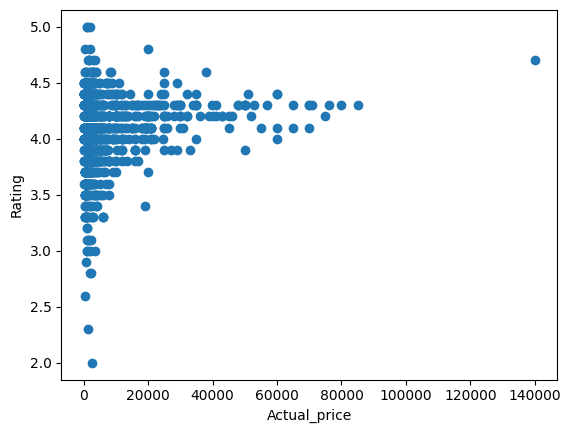

In [40]:
# Plot actual_price vs. rating
plt.scatter(df['actual_price'], df['rating'])
plt.xlabel('Actual_price')
plt.ylabel('Rating')
plt.show()

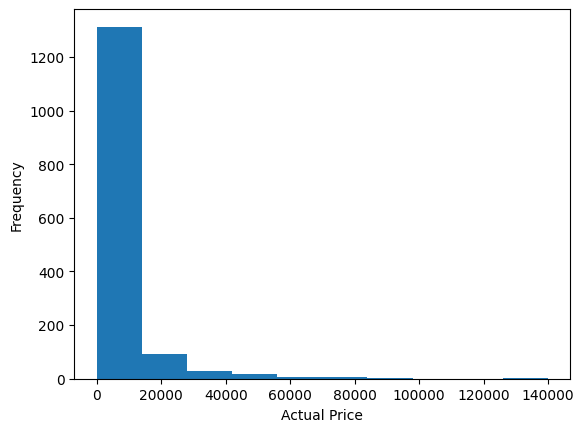

In [41]:
# Plot distribution of actual_price
plt.hist(df['actual_price'])
plt.xlabel('Actual Price')
plt.ylabel('Frequency')
plt.show()

In [42]:
from sklearn.preprocessing import LabelEncoder
# label encode categorical variables

le_product_id = LabelEncoder()
le_category = LabelEncoder()
le_review_id = LabelEncoder()
le_review_content = LabelEncoder()
le_product_name = LabelEncoder()
le_user_name = LabelEncoder()
le_about_product = LabelEncoder()
le_user_id = LabelEncoder()
le_review_title = LabelEncoder()
le_img_link = LabelEncoder()
le_product_link = LabelEncoder()

df['product_id'] = le_product_id.fit_transform(df['product_id'])
df['category'] = le_category.fit_transform(df['category'])
df['review_id'] = le_review_id.fit_transform(df['review_id'])
df['review_content'] = le_review_content.fit_transform(df['review_content'])
df['product_name'] = le_product_name.fit_transform(df['product_name'])
df['user_name'] = le_user_name.fit_transform(df['user_name'])
df['about_product'] = le_about_product.fit_transform(df['about_product'])
df['user_id'] = le_user_id.fit_transform(df['user_id'])
df['review_title'] = le_review_title.fit_transform(df['review_title'])
df['img_link'] = le_img_link.fit_transform(df['img_link'])
df['product_link'] = le_product_link.fit_transform(df['product_link'])

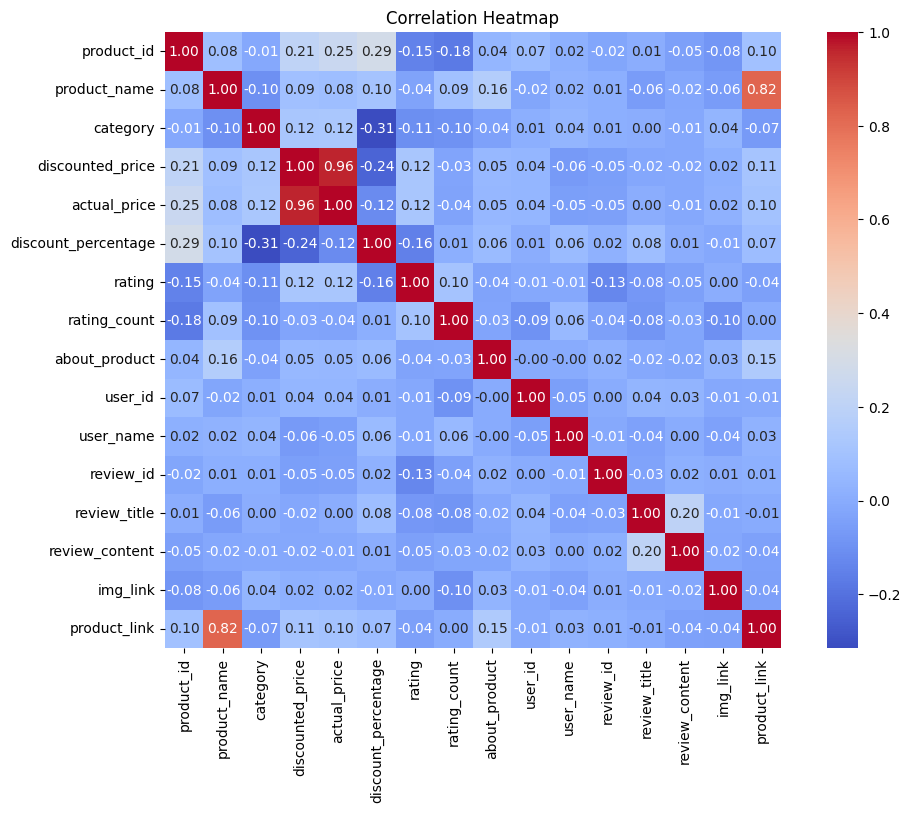

In [43]:
# # Plot correlations between variables
# correlation_matrix = df.corr()
# sns.heatmap(correlation_matrix, annot=True)
# plt.show()


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Set figure size for better visibility
plt.figure(figsize=(12, 8))

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar=True)

# Show plot
plt.title("Correlation Heatmap")
plt.show()


                     product_id  product_name  category  discounted_price  \
product_id             1.000000      0.084089 -0.012565          0.206448   
product_name           0.084089      1.000000 -0.103778          0.090665   
category              -0.012565     -0.103778  1.000000          0.119365   
discounted_price       0.206448      0.090665  0.119365          1.000000   
actual_price           0.246733      0.078567  0.122451          0.961915   
discount_percentage    0.289514      0.101913 -0.314465         -0.242412   
rating                -0.149139     -0.035970 -0.108730          0.120335   
rating_count          -0.175530      0.092450 -0.098421         -0.027081   
about_product          0.041404      0.158263 -0.038753          0.052618   
user_id                0.065688     -0.024093  0.012707          0.041731   
user_name              0.016145      0.024598  0.037822         -0.063069   
review_id             -0.024282      0.013492  0.014015         -0.049757   

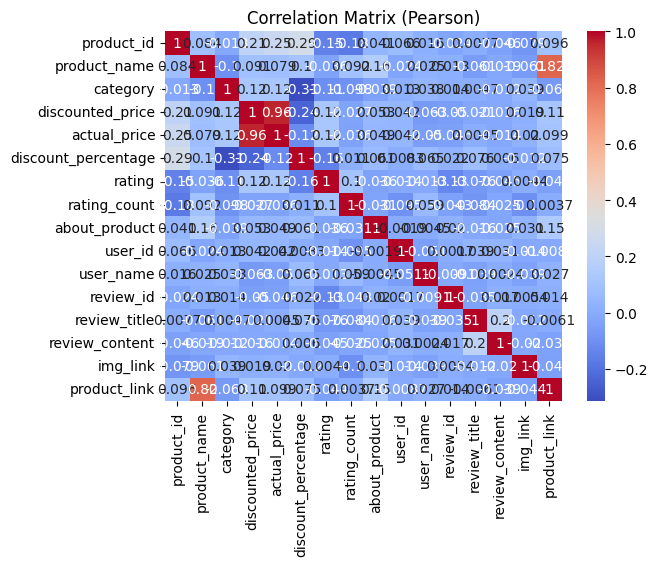

                     product_id  product_name  category  discounted_price  \
product_id             1.000000      0.083112 -0.013553          0.146237   
product_name           0.083112      1.000000 -0.106193          0.056597   
category              -0.013553     -0.106193  1.000000          0.360733   
discounted_price       0.146237      0.056597  0.360733          1.000000   
actual_price           0.269064      0.105719  0.277291          0.932787   
discount_percentage    0.271879      0.106467 -0.322090         -0.372991   
rating                -0.144339     -0.061885 -0.100845          0.079984   
rating_count          -0.406559      0.128565 -0.171893          0.122296   
about_product          0.041118      0.157675 -0.048319         -0.056144   
user_id                0.065228     -0.023810  0.015389          0.079048   
user_name              0.016859      0.024479  0.038735         -0.018599   
review_id             -0.024644      0.015269  0.016119         -0.048420   

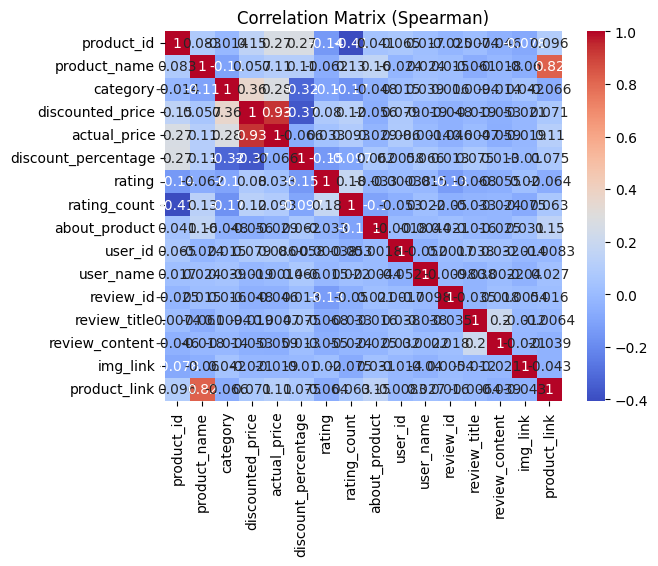

In [44]:
#Calculate Pearson correlation coefficients (default in Pandas)
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)

# Create a heatmap to visualize the correlations
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Pearson)")
plt.show()

# Calculate Spearman correlation coefficients (for non-linear relationships)
spearman_correlation_matrix = df.corr(method="spearman")

# Print the Spearman correlation matrix
print(spearman_correlation_matrix)

# Create a heatmap to visualize the Spearman correlations
sns.heatmap(spearman_correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Spearman)")
plt.show()
                    

In [45]:
# Calculate correlation coefficient between product price and sales
correlation_coefficient = np.corrcoef(df['actual_price'], df['rating'])[0, 1]

# Print correlation coefficient
print(correlation_coefficient)

0.12163645139700355


In [46]:
# Grouping and Aggregation

In [47]:
# Calculate mean sales by product category
grouped_df = df.groupby('category')['rating'].mean()

# Print mean sales by product category
print(grouped_df)

category
0      3.800000
1      4.150000
2      3.500000
3      3.600000
4      4.050000
         ...   
206    4.250000
207    4.150000
208    4.300000
209    4.133333
210    4.300000
Name: rating, Length: 211, dtype: float64


In [48]:
# Calculate summary statistics for groups
# Mean rating by category
mean_sales_by_category = df.groupby('category')['rating'].mean()
print(mean_sales_by_category)

# Median rating by review_content
median_sales_by_age = df.groupby('review_content')['rating'].median()
print(median_sales_by_age)

# Standard deviation of actual_price by product_name
std_price_by_brand = df.groupby('product_name')['actual_price'].std()
print(std_price_by_brand)

category
0      3.800000
1      4.150000
2      3.500000
3      3.600000
4      4.050000
         ...   
206    4.250000
207    4.150000
208    4.300000
209    4.133333
210    4.300000
Name: rating, Length: 211, dtype: float64
review_content
0       4.1
1       3.9
2       4.3
3       4.3
4       3.8
       ... 
1207    4.0
1208    4.3
1209    4.3
1210    4.5
1211    4.3
Name: rating, Length: 1212, dtype: float64
product_name
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1332    NaN
1333    NaN
1334    NaN
1335    NaN
1336    0.0
Name: actual_price, Length: 1337, dtype: float64


In [49]:
# Create pivot tables
# Pivot table of rating by category and customer location
pivot_table = df.pivot_table(values='rating', index='category', columns='product_link', aggfunc='mean')
print(pivot_table)

# Pivot table of average rating_count by customer age group and product category
pivot_table = df.pivot_table(values='rating_count', index='review_content', columns='category', aggfunc='mean')
print(pivot_table)

product_link  0     1     2     3     4     5     6     7     8     9     ...  \
category                                                                  ...   
0              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
...            ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
206            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
207            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
208            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
209            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
210            NaN   NaN   N

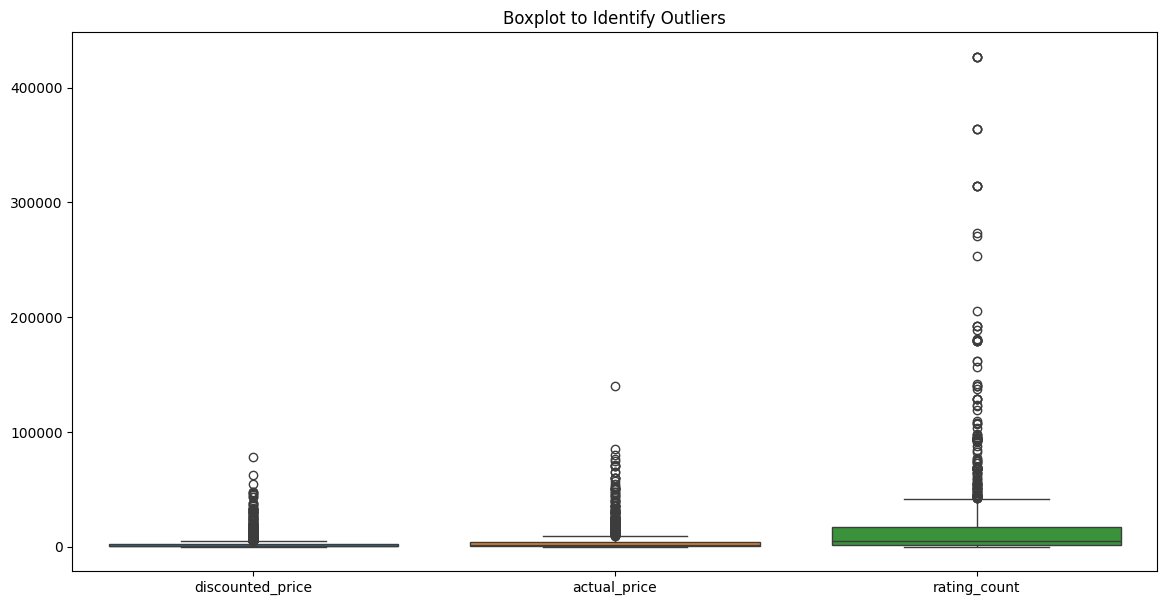

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots to visualize outliers in the numerical columns
plt.figure(figsize=(14, 7))

# Select the columns you want to check for outliers
sns.boxplot(data=df[['discounted_price', 'actual_price', 'rating_count']])

plt.title('Boxplot to Identify Outliers')
plt.show()


In [51]:
Q1 = df[['discounted_price', 'actual_price', 'rating_count']].quantile(0.25)
Q3 = df[['discounted_price', 'actual_price', 'rating_count']].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as points outside 1.5 * IQR above Q3 or below Q1
outlier_condition = ((df[['discounted_price', 'actual_price', 'rating_count']] < (Q1 - 1.5 * IQR)) | 
                     (df[['discounted_price', 'actual_price', 'rating_count']] > (Q3 + 1.5 * IQR)))

outliers = df[outlier_condition.any(axis=1)]
print(outliers)



      product_id  product_name  category  discounted_price  actual_price  \
1            848           134        10             199.0         349.0   
3            643          1264        10             329.0         699.0   
8             15          1080        49             499.0         999.0   
9            515           133        10             199.0         299.0   
11           262          1281        10             299.0         799.0   
...          ...           ...       ...               ...           ...   
1428         269          1042       169            6120.0        8073.0   
1430         797           676       188           18999.0       29999.0   
1432         828            33       177            5999.0       11495.0   
1437          62           544       189            6199.0       10999.0   
1438         694           480       155            6790.0       10995.0   

      discount_percentage  rating  rating_count  about_product  user_id  \
1           

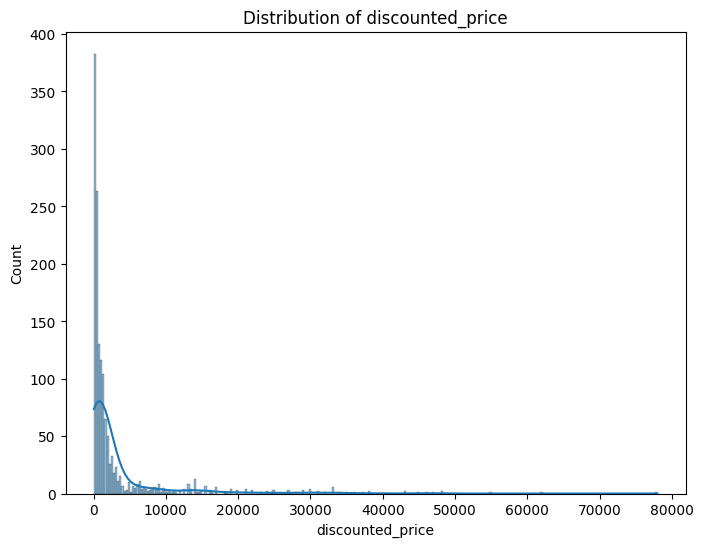

Skewness of discounted_price: 4.447834547001024
discounted_price is positively skewed.


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Uncomment this and replace with your actual file path

# For this example, let's assume you're interested in checking the skewness of the 'discounted_price' column
column_name = 'discounted_price'

# Check skewness
skewness_value = skew(df[column_name])

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.histplot(df[column_name], kde=True)
plt.title(f'Distribution of {column_name}')
plt.show()

# Print skewness value
print(f'Skewness of {column_name}: {skewness_value}')

# Interpret skewness
if skewness_value > 1:
    print(f'{column_name} is positively skewed.')
elif skewness_value < -1:
    print(f'{column_name} is negatively skewed.')
else:
    print(f'{column_name} is approximately normally distributed.')


Skewness after Box-Cox transformation: 0.047914983927101


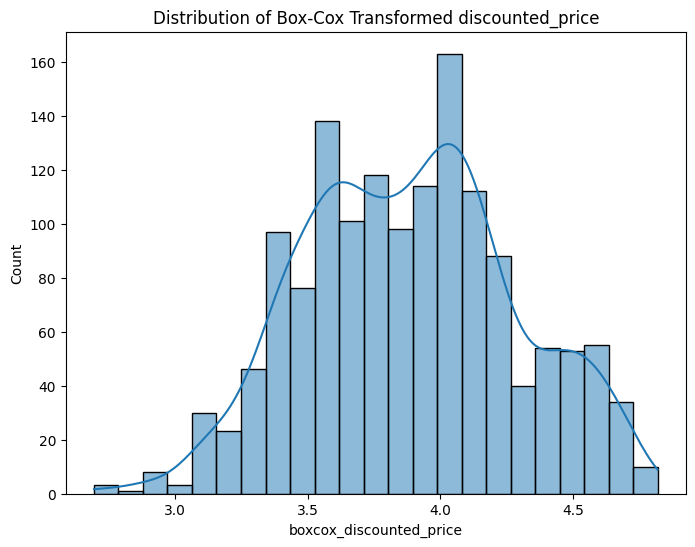

In [53]:
from scipy.stats import boxcox

# Ensure 'discounted_price' is positive (Box-Cox cannot handle zero or negative values)
df['positive_discounted_price'] = df['discounted_price'] + 1  # Shift to make positive if necessary

# Apply Box-Cox transformation
df['boxcox_discounted_price'], lam = boxcox(df['positive_discounted_price'])

# Check skewness after Box-Cox transformation
new_skewness_boxcox = skew(df['boxcox_discounted_price'])
print(f'Skewness after Box-Cox transformation: {new_skewness_boxcox}')

# Plot the new distribution after Box-Cox transformation
plt.figure(figsize=(8, 6))
sns.histplot(df['boxcox_discounted_price'], kde=True)
plt.title('Distribution of Box-Cox Transformed discounted_price')
plt.show()




In [54]:
# Create price_diff: actual_price - discounted_price
df['price_diff'] = df['actual_price'] - df['discounted_price']

# Create review_score: rating * rating_count
df['review_score'] = df['rating'] * df['rating_count']

print("Created 'price_diff' and 'review_score'")
df[['actual_price', 'discounted_price', 'price_diff', 'rating', 'rating_count', 'review_score']].head()



Created 'price_diff' and 'review_score'


,actual_price,discounted_price,price_diff,rating,rating_count,review_score
0,1099.0,399.0,700.0,4.2,24269.0,101929.8
1,349.0,199.0,150.0,4.0,43994.0,175976.0
2,1899.0,199.0,1700.0,3.9,7928.0,30919.2
3,699.0,329.0,370.0,4.2,94363.0,396324.6
4,399.0,154.0,245.0,4.2,16905.0,71001.0


In [55]:
# # Normalization/Scaling
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# num_cols = ['discounted_price', 'actual_price', 'price_diff', 'rating', 'rating_count', 'review_score']

# df[num_cols] = scaler.fit_transform(df[num_cols])

# print(" Scaled numerical columns")
# df[num_cols].head()




from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Columns to be scaled
num_cols = ['discounted_price', 'actual_price', 'price_diff', 'rating', 'rating_count', 'review_score']

# Apply MinMaxScaler and transform the selected columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Print the scaled numerical columns
print("Scaled numerical columns:")
print(df[num_cols].head())



Scaled numerical columns:
   discounted_price  actual_price  price_diff    rating  rating_count  \
0          0.004618      0.007579    0.011307  0.733333      0.056835   
1          0.002053      0.002216    0.002423  0.666667      0.103033   
2          0.002053      0.013299    0.027459  0.633333      0.018563   
3          0.003720      0.004719    0.005976  0.733333      0.221001   
4          0.001475      0.002574    0.003957  0.733333      0.039588   

   review_score  
0      0.054254  
1      0.093668  
2      0.016456  
3      0.210957  
4      0.037791  


In [56]:
# product_name (Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['product_name_encoded'] = le.fit_transform(df['product_name'])

print("✅ Label Encoded 'product_name'")
df[['product_name', 'product_name_encoded']].head()



✅ Label Encoded 'product_name'


,product_name,product_name_encoded
0,1158,1158
1,134,134
2,1023,1023
3,1264,1264
4,829,829


In [57]:
# Display the first few rows of your dataset
print(df.head())

# List all the columns (including the one-hot encoded ones)
print(df.columns)

# If you want to select a specific category column for the next steps, for example:
category_columns = df.filter(like='category_')
print(category_columns.head())


   product_id  product_name  category  discounted_price  actual_price  \
0         346          1158        10          0.004618      0.007579   
1         848           134        10          0.002053      0.002216   
2         819          1023        10          0.002053      0.013299   
3         643          1264        10          0.003720      0.004719   
4         588           829        10          0.001475      0.002574   

   discount_percentage    rating  rating_count  about_product  user_id  ...  \
0                 64.0  0.733333      0.056835            474      623  ...   
1                 43.0  0.666667      0.103033            279       88  ...   
2                 90.0  0.633333      0.018563           1250      849  ...   
3                 53.0  0.733333      0.221001           1010      254  ...   
4                 61.0  0.733333      0.039588           1189       17  ...   

   review_id  review_title  review_content  img_link  product_link  \
0        817    

In [58]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Verify again that 'category' exists
print(df.columns)


Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link',
       'positive_discounted_price', 'boxcox_discounted_price', 'price_diff',
       'review_score', 'product_name_encoded'],
      dtype='object')


In [59]:
# Check the first few values in the 'category' column
print(df['category'].head())


0    10
1    10
2    10
3    10
4    10
Name: category, dtype: int64


In [60]:
# Step 1: Convert 'category' to string (if it's not already)
df['category'] = df['category'].astype(str)

# Step 2: Extract the last category from the pipe-separated hierarchy
df['main_category'] = df['category'].apply(lambda x: x.split('|')[-1])

# Step 3: One-hot encode the cleaned category column
df = pd.get_dummies(df, columns=['main_category'], drop_first=True)

# Verify the result
print(df.head())


   product_id  product_name category  discounted_price  actual_price  \
0         346          1158       10          0.004618      0.007579   
1         848           134       10          0.002053      0.002216   
2         819          1023       10          0.002053      0.013299   
3         643          1264       10          0.003720      0.004719   
4         588           829       10          0.001475      0.002574   

   discount_percentage    rating  rating_count  about_product  user_id  ...  \
0                 64.0  0.733333      0.056835            474      623  ...   
1                 43.0  0.666667      0.103033            279       88  ...   
2                 90.0  0.633333      0.018563           1250      849  ...   
3                 53.0  0.733333      0.221001           1010      254  ...   
4                 61.0  0.733333      0.039588           1189       17  ...   

   main_category_90  main_category_91  main_category_92  main_category_93  \
0             F

In [61]:
from sklearn.model_selection import train_test_split

# Assuming 'rating' is your target column
X = df.drop('rating', axis=1)  # Features
y = df['rating']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1172, 230)
Shape of X_test: (293, 230)
Shape of y_train: (1172,)
Shape of y_test: (293,)


# Item-Based Collaborative Filtering model

In [73]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def load_data(file_path):
    # Load your dataset
    df = pd.read_csv(file_path)
    
    # Convert 'rating' column to numeric, invalid parsing will be set as NaN
    df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
    
    # Fill NaN ratings with 0 (if that's your desired behavior)
    df['rating'] = df['rating'].fillna(0)
    
    return df

def create_interaction_matrix(df):
    # Create user-item interaction matrix
    interaction_matrix = df.pivot_table(index='user_id', columns='product_id', values='rating')
    
    # Fill NaN with 0s (assuming no interaction for the user-item pair)
    return interaction_matrix.fillna(0)

def calculate_item_similarity(interaction_matrix):
    # Calculate cosine similarity between items
    return cosine_similarity(interaction_matrix.T)

def recommend_items_based_on_similarities(item_similarity_df, top_n=5):
    # Find the most similar item
    total_similarity_scores = item_similarity_df.sum(axis=1)
    
    # Get the most similar item (highest score)
    most_similar_item = total_similarity_scores.idxmax()  # The item with the max sum of similarities
    
    # Get similar items based on that item
    similar_scores = item_similarity_df[most_similar_item]
    
    # Sort the items based on similarity score
    similar_items = similar_scores.sort_values(ascending=False)
    
    # Exclude the item itself and get top N items
    similar_items = similar_items[similar_items.index != most_similar_item].head(top_n)
    
    return most_similar_item, similar_items.index.tolist()

if __name__ == "__main__":
    # Load data
    df = load_data('amazon.csv')  # Change 'your_file.csv' to your actual file path
    
    # Create interaction matrix
    interaction_matrix = create_interaction_matrix(df)
    
    # Calculate item similarities
    item_similarity = calculate_item_similarity(interaction_matrix)
    
    # Convert similarity matrix to DataFrame for easier visualization
    item_similarity_df = pd.DataFrame(item_similarity, index=interaction_matrix.columns, columns=interaction_matrix.columns)
    
    # Recommend items
    most_similar_item, recommended_items = recommend_items_based_on_similarities(item_similarity_df, top_n=5)
    
    # Output results
    print(f"Most similar item: {most_similar_item}")
    print("Recommended Items: ", recommended_items)


Most similar item: B08N1WL9XW
Recommended Items:  ['B08P9RYPLR', 'B09NHVCHS9', 'B09NJN8L25', 'B09NKZXMWJ', 'B09NL4DJ2Z']


# Content-Based Filtering:

In [63]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load your data
df_raw = pd.read_csv("amazon.csv")
df = df_raw.copy()

# Fill missing values and combine relevant text features
df['combined_features'] = (
    df['product_name'].fillna('') + ' ' +
    df['category'].fillna('') + ' ' +
    df['about_product'].fillna('')
)

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform the combined text features
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

# Calculate cosine similarity between all products
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Convert cosine similarity matrix to a DataFrame for easier handling
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['product_id'], columns=df['product_id'])

# Function to recommend items based on the most similar product in the dataset
def recommend_items_based_on_similarities(top_n=5):
    # Sum the cosine similarity scores to get an overall similarity score for each product
    total_similarity_scores = cosine_sim_df.sum(axis=1)
    
    # Find the product with the highest similarity score (excluding itself)
    most_similar_item = total_similarity_scores.idxmax()  # Product with highest total similarity

    # Get the similarity scores for that product
    similarity_scores = cosine_sim_df[most_similar_item]
    
    # Sort the products by similarity score (excluding the product itself)
    similar_products = similarity_scores.sort_values(ascending=False)
    
    # Drop the original product from the recommendations
    similar_products = similar_products.drop(most_similar_item)
    
    # Get the top N most similar products
    recommended_products = similar_products.head(top_n)
    
    return most_similar_item, recommended_products.index.tolist()

# Example: Recommend top 5 products based on the most similar product in the dataset
most_similar_item, recommended_items = recommend_items_based_on_similarities(top_n=5)

print(f"Most similar item: {most_similar_item}")
print("Recommended Items: ", recommended_items)


Most similar item: B08PSVBB2X
Recommended Items:  ['B08NW8GHCJ', 'B09QGZFBPM', 'B09QGZM8QB', 'B08PSQRW2T', 'B08WKG2MWT']


# Hybrid Model:

In [70]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load your data
df_raw = pd.read_csv("amazon.csv")
df = df_raw.copy()

# Fill missing values and combine relevant text features
df['combined_features'] = (
    df['product_name'].fillna('') + ' ' +
    df['category'].fillna('') + ' ' +
    df['about_product'].fillna('')
)

# Convert the 'rating' column to numeric, forcing errors to NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop rows with NaN in 'rating' after conversion (optional)
df = df.dropna(subset=['rating'])

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform the combined text features
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

# Calculate cosine similarity between all products
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Convert cosine similarity matrix to a DataFrame for easier handling
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['product_id'], columns=df['product_id'])

# Model 1: Item-based collaborative filtering
# Create interaction matrix: user-product interaction, where rating is the value
interaction_matrix = df.pivot_table(index='user_id', columns='product_id', values='rating')
interaction_matrix = interaction_matrix.fillna(0)

# Now you can calculate item similarity using cosine similarity
item_similarity = cosine_similarity(interaction_matrix.T)

# Convert similarity matrix to DataFrame for better visualization
item_similarity_df = pd.DataFrame(item_similarity, index=interaction_matrix.columns, columns=interaction_matrix.columns)

# Function to recommend items based on similarity
def recommend_items_based_on_similarities(top_n=5):
    # Sum the cosine similarity scores to get an overall similarity score for each product
    total_similarity_scores = item_similarity_df.sum(axis=1)
    
    # Find the product with the highest similarity score (excluding itself)
    most_similar_item = total_similarity_scores.idxmax()  # Product with highest total similarity

    # Get the similarity scores for that product
    similarity_scores = item_similarity_df[most_similar_item]
    
    # Sort the products by similarity score (excluding the product itself)
    similar_products = similarity_scores.sort_values(ascending=False)
    
    # Drop the original product from the recommendations
    similar_products = similar_products.drop(most_similar_item)
    
    # Get the top N most similar products
    recommended_products = similar_products.head(top_n)
    
    return most_similar_item, recommended_products.index.tolist()

# Example: Recommend top 5 products based on the most similar product in the dataset
most_similar_item, recommended_items = recommend_items_based_on_similarities(top_n=5)

print(f"Most similar item: {most_similar_item}")
print("Recommended Items: ", recommended_items)


Most similar item: B08N1WL9XW
Recommended Items:  ['B08P9RYPLR', 'B09NHVCHS9', 'B09NJN8L25', 'B09NKZXMWJ', 'B09NL4DJ2Z']
